### Dataset Style: Relation between features

Imports:

In [26]:
#imports
import sys
sys.path.append('/home/elenaruiz/Documents/TFG/FNC')
import pandas as pd
import numpy as np
from src.utils import io
import matplotlib.pyplot as plt
import seaborn as sns
from src.fake_news_detector.exploration.helpers import helpers as h
from sklearn import preprocessing

In [34]:
articles = io.read_json_file('/home/elenaruiz/Documents/TFG/FNC/src/data/dataset_style.json')
df = pd.DataFrame(data=articles['articles'])
del df['mean_noun_phrases']
del df['n_quotes']
df['fake'] = df['fake']*1
df.dtypes

fake                                 int64
mean_character_per_word            float64
mean_words_per_sentence            float64
n_sentences                          int64
n_words                              int64
pert_different_words               float64
pert_total_adj                     float64
pert_total_conj_prep               float64
pert_total_negative_words          float64
pert_total_nouns                   float64
pert_total_positive_words          float64
pert_total_verbs                   float64
sentiment                          float64
title_n_words                        int64
title_pert_total_conj_prep         float64
title_pert_total_negative_words    float64
title_pert_total_positive_words    float64
title_sentiment                    float64
dtype: object

### Normalize

In [27]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [35]:
names = df.columns

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

/home/elenaruiz/Documents/TFG/FNC/env/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/elenaruiz/Documents/TFG/FNC/env/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
fake_df = df.loc[df['fake'] == 1]
real_df = df.loc[df['fake'] == 0]

In [42]:
sentiment_relations = df[['fake','sentiment', 'pert_total_negative_words', 'pert_total_positive_words', 'title_sentiment', 'title_pert_total_negative_words', 'title_pert_total_positive_words' ]]

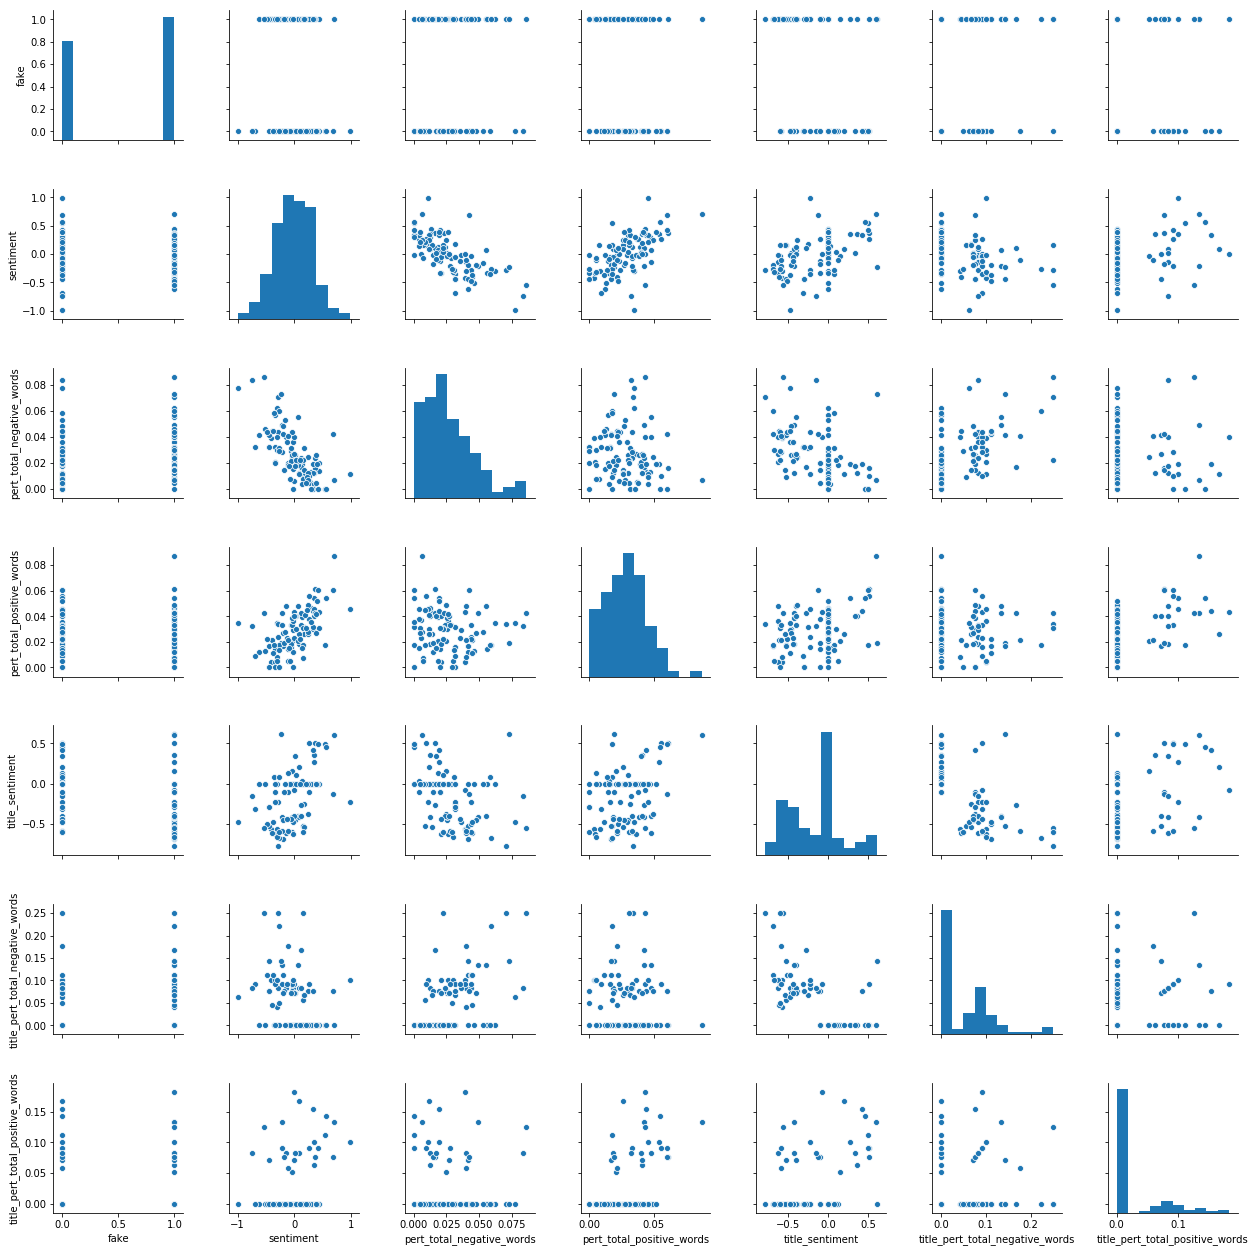

In [43]:
sns.pairplot(sentiment_relations)

In [44]:
sentiment_relations.corr()

,fake,sentiment,pert_total_negative_words,pert_total_positive_words,title_sentiment,title_pert_total_negative_words,title_pert_total_positive_words
fake,1.000000,-0.166110,0.178187,-0.030821,-0.230717,0.194835,-0.088706
sentiment,-0.166110,1.000000,-0.697090,0.594780,0.478912,-0.342618,0.237973
pert_total_negative_words,0.178187,-0.697090,1.000000,-0.120580,-0.424340,0.548711,-0.029743
pert_total_positive_words,-0.030821,0.594780,-0.120580,1.000000,0.329653,-0.028350,0.456153
title_sentiment,-0.230717,0.478912,-0.424340,0.329653,1.000000,-0.649130,0.297017
title_pert_total_negative_words,0.194835,-0.342618,0.548711,-0.028350,-0.649130,1.000000,0.127763
title_pert_total_positive_words,-0.088706,0.237973,-0.029743,0.456153,0.297017,0.127763,1.000000


In [45]:
df.corr()

,fake,mean_character_per_word,mean_words_per_sentence,n_sentences,n_words,pert_different_words,pert_total_adj,pert_total_conj_prep,pert_total_negative_words,pert_total_nouns,pert_total_positive_words,pert_total_verbs,sentiment,title_n_words,title_pert_total_conj_prep,title_pert_total_negative_words,title_pert_total_positive_words,title_sentiment
fake,1.000000,NaN,-0.379898,-0.087369,-0.271043,0.239972,0.025513,0.017846,0.178187,-0.359669,-0.030821,0.297955,-0.166110,0.259933,0.017846,0.194835,-0.088706,-0.230717
mean_character_per_word,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_words_per_sentence,-0.379898,NaN,1.000000,-0.154040,0.071866,-0.014435,0.200452,-0.004495,-0.053067,0.571613,-0.011935,-0.490568,0.060527,0.109911,-0.004495,-0.125032,0.095996,0.050326
n_sentences,-0.087369,NaN,-0.154040,1.000000,0.717563,-0.492454,0.066816,0.086642,0.080100,-0.208889,0.059377,0.084855,0.068620,-0.211127,0.086642,0.032661,-0.131428,0.253294
n_words,-0.271043,NaN,0.071866,0.717563,1.000000,-0.786557,0.136001,0.205637,-0.005403,-0.067053,0.098769,-0.214100,0.178108,-0.174341,0.205637,-0.038724,-0.141562,0.168513
pert_different_words,0.239972,NaN,-0.014435,-0.492454,-0.786557,1.000000,0.064691,-0.029277,0.168824,0.045333,0.056719,0.124338,-0.156303,0.052674,-0.029277,0.064913,0.179024,-0.061443
pert_total_adj,0.025513,NaN,0.200452,0.066816,0.136001,0.064691,1.000000,0.113302,-0.104491,-0.242146,0.226168,-0.165203,0.218243,-0.195312,0.113302,-0.088334,0.175436,0.190006
pert_total_conj_prep,0.017846,NaN,-0.004495,0.086642,0.205637,-0.029277,0.113302,1.000000,0.137775,-0.228656,0.246994,0.085424,0.126395,0.010419,1.000000,0.225753,0.028787,-0.040575
pert_total_negative_words,0.178187,NaN,-0.053067,0.080100,-0.005403,0.168824,-0.104491,0.137775,1.000000,-0.059545,-0.120580,0.216039,-0.697090,0.070261,0.137775,0.548711,-0.029743,-0.424340
pert_total_nouns,-0.359669,NaN,0.571613,-0.208889,-0.067053,0.045333,-0.242146,-0.228656,-0.059545,1.000000,-0.045993,-0.704646,-0.011733,0.169113,-0.228656,-0.115841,0.181456,0.038905


In [40]:
filter_df = df[['fake','mean_words_per_sentence','pert_total_nouns','pert_total_verbs','n_words','sentiment']]

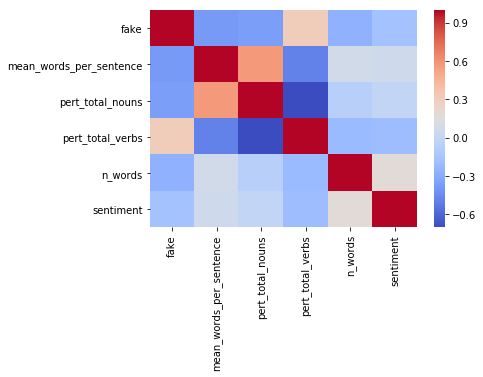

In [41]:
sns.heatmap(filter_df.corr(), cmap='coolwarm')